In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xs = np.arange(1, 100, 0.1)

In [3]:
ys = np.sin(xs) - np.random.rand(len(xs))

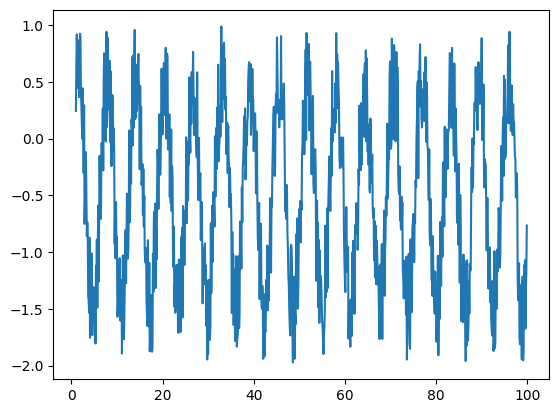

In [4]:
plt.plot(xs, ys)

In [5]:
ys

array([ 2.42629909e-01,  6.50712491e-01,  9.16476159e-01,  6.50932177e-01,
        4.46074562e-01,  8.62425388e-01,  5.41372210e-01,  3.63466217e-01,
        6.99072325e-01,  9.21830121e-01,  8.93113029e-01,  4.38379073e-01,
        3.00326104e-01,  1.94728454e-01, -2.67870382e-03,  4.41941786e-01,
        2.06437393e-01, -3.03205660e-01,  2.93004590e-01, -7.51763589e-01,
       -5.54191732e-01, -1.34370941e-01, -1.20547072e-01, -5.32335734e-01,
       -8.57217167e-01, -7.34566748e-01, -8.32046126e-01, -1.39725151e+00,
       -1.41413582e+00, -1.53409641e+00, -8.73253799e-01, -1.75444857e+00,
       -1.45557451e+00, -1.22713473e+00, -1.01107223e+00, -1.01467501e+00,
       -1.73072431e+00, -1.55631327e+00, -1.35438381e+00, -1.30873381e+00,
       -1.62956478e+00, -1.54261737e+00, -1.40977210e+00, -1.80514774e+00,
       -1.12379461e+00, -1.16760175e+00, -8.90003411e-01, -1.48856392e+00,
       -9.60701675e-01, -5.90645953e-01, -1.25934859e+00, -7.58045264e-01,
       -1.52668969e-01, -

In [6]:
def sequence(data, prev):

    iterable = [data[i:] for i in range(prev + 1)]

    a = [k[:-1] for k in zip(*iterable)]
    b = [k[-1] for k in zip(*iterable)]


    a = np.array(a)
    b = np.array(b)

    b = b.reshape(-1, 1)

    return a, b

In [7]:
def difference(data):
    return [k[1] - k[0] for k in zip(data, data[1:])]

In [104]:
d = difference(ys)

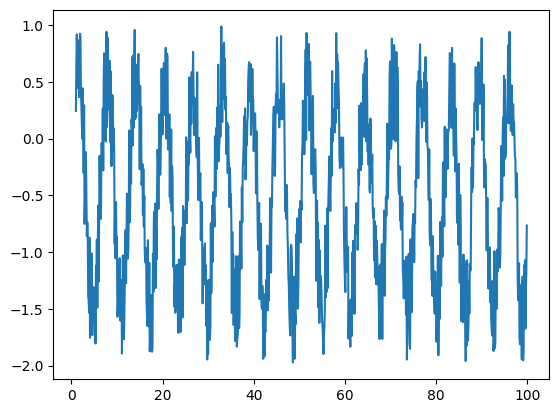

In [9]:
plt.plot(xs, ys)

In [28]:
x, y = sequence(ys, 40)

In [29]:
x[:5]

array([[ 0.24262991,  0.65071249,  0.91647616,  0.65093218,  0.44607456,
         0.86242539,  0.54137221,  0.36346622,  0.69907233,  0.92183012,
         0.89311303,  0.43837907,  0.3003261 ,  0.19472845, -0.0026787 ,
         0.44194179,  0.20643739, -0.30320566,  0.29300459, -0.75176359,
        -0.55419173, -0.13437094, -0.12054707, -0.53233573, -0.85721717,
        -0.73456675, -0.83204613, -1.39725151, -1.41413582, -1.53409641,
        -0.8732538 , -1.75444857, -1.45557451, -1.22713473, -1.01107223,
        -1.01467501, -1.73072431, -1.55631327, -1.35438381, -1.30873381],
       [ 0.65071249,  0.91647616,  0.65093218,  0.44607456,  0.86242539,
         0.54137221,  0.36346622,  0.69907233,  0.92183012,  0.89311303,
         0.43837907,  0.3003261 ,  0.19472845, -0.0026787 ,  0.44194179,
         0.20643739, -0.30320566,  0.29300459, -0.75176359, -0.55419173,
        -0.13437094, -0.12054707, -0.53233573, -0.85721717, -0.73456675,
        -0.83204613, -1.39725151, -1.41413582, -1.

In [30]:
y[:5]

array([[-1.62956478],
       [-1.54261737],
       [-1.4097721 ],
       [-1.80514774],
       [-1.12379461]])

In [31]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [33]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2624      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [34]:
train_size = round(0.75 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [35]:
history = model.fit(x_train, y_train, validation_split=0.08, epochs = 100)

Epoch 1/100
21/21 [==============================] - 1s 6ms/step - loss: 0.3307 - mae: 0.4465 - val_loss: 0.1373 - val_mae: 0.3062
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1070 - mae: 0.2675 - val_loss: 0.1283 - val_mae: 0.3051
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0935 - mae: 0.2513 - val_loss: 0.1167 - val_mae: 0.2914
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0870 - mae: 0.2436 - val_loss: 0.1162 - val_mae: 0.2909
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0843 - mae: 0.2412 - val_loss: 0.1143 - val_mae: 0.2915
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0782 - mae: 0.2341 - val_loss: 0.1218 - val_mae: 0.3045
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0822 - mae: 0.2381 - val_loss: 0.1194 - val_mae: 0.2954
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0750 - m

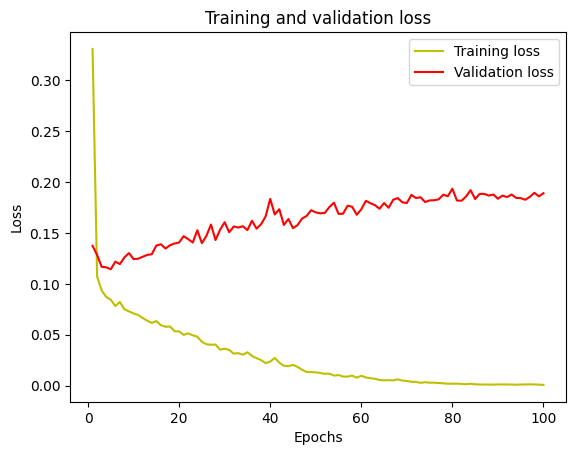

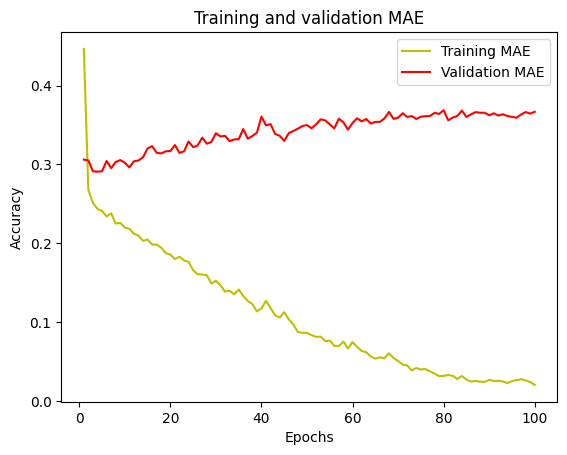

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
y_pred = model.predict(x_test)

8/8 [==============================] - 0s 779us/step


In [38]:
xs = np.arange(0, len(y_pred), 1)

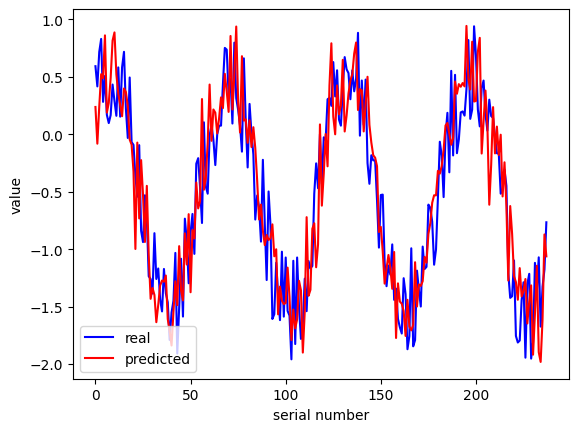

In [39]:
plt.plot(xs, y_test, color = 'blue', label = 'real')
plt.plot(xs, y_pred, color = 'red', label = 'predicted')
plt.xlabel('serial number')
plt.ylabel('value')

plt.legend()

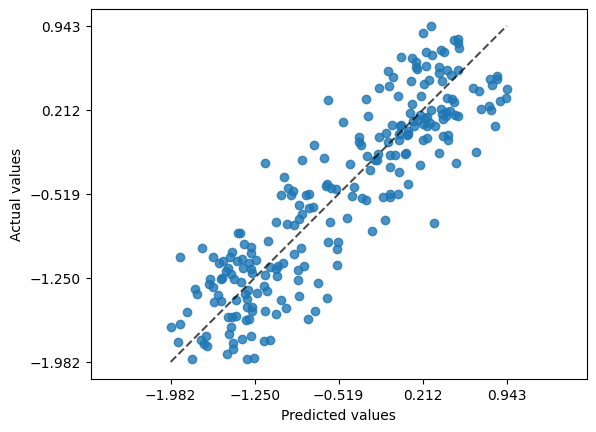

R2 Score: 0.7707364253059495
Mean Absolute Error: 0.3120011523325651
Mean Squared Error: 0.14135014169742313
Mean Absolute Percentage Error: 1.7966284965935049
Mean Absolute Error: 0.27835631296901364
Explained Varaince Score: 0.7712518065228446


In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot(kind="actual_vs_predicted")
plt.show()

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {median_absolute_error(y_test, y_pred)}")
print(f"Explained Varaince Score: {explained_variance_score(y_test, y_pred)}")